In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

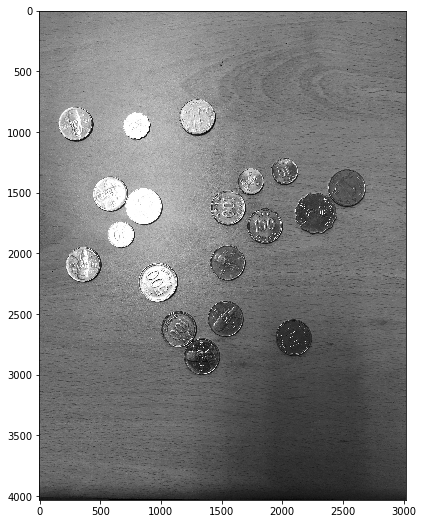

In [83]:
image = 'coins_set4.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

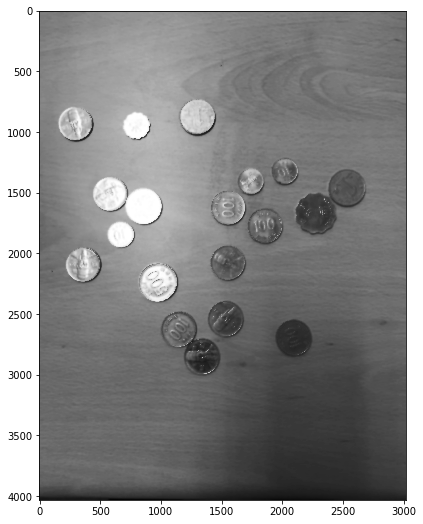

In [84]:
#img = cv2.medianBlur(img,21)
img = cv2.bilateralFilter(img,23,101,101)
#img =  cv2.GaussianBlur(img, (27,91), cv2.BORDER_DEFAULT)
img = cv2.medianBlur(img,5)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

In [85]:
all_circs = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, 120, param1 = 50, param2 = 30, minRadius = 100, maxRadius = 180)
all_circs_rounded = np.uint16(np.around(all_circs))
print(all_circs_rounded)
print(all_circs_rounded.shape)
print('I have found ' + str(all_circs_rounded.shape[1]) + ' coins.')

[[[ 972 2242  154]
  [1562 1624  137]
  [ 356 2096  136]
  [ 862 1610  145]
  [ 586 1510  140]
  [1302  880  144]
  [ 292  928  139]
  [ 674 1846  107]
  [1154 2630  134]
  [1548 2074  137]
  [1866 1778  145]
  [1748 1410  103]
  [2024 1324  102]
  [1340 2856  136]
  [1536 2552  154]
  [2540 1466  155]
  [2100 2702  152]
  [ 804  944  106]
  [2254 1668  152]]]
(1, 19, 3)
I have found 19 coins.


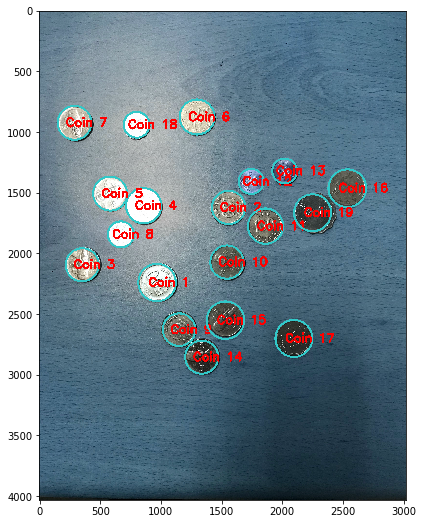

In [86]:
count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(img_orig, (i[0],i[1]),i[2],(50, 200, 200), 15)
    cv2.circle(img_orig, (i[0],i[1]),2,(255, 0, 0), 5)
    cv2.putText(img_orig, "Coin " + str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 3.3, (255,0,0), 15)
    count += 1
    
    plt.rcParams["figure.figsize"] = (16,9)
    plt.imshow(img_orig)